## Analysis of the class: airplane

In [1]:
from cnn-error-analysis import cifar10
from cnn-error-analysis import data_analysis as da
from cnn-error-analysis import visualization as vis
from cnn-error-analysis import evaluation as ev

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### set paths

In [2]:
# set paths to stored extracted features
fv_test_url = "D:/tmp/inceptionV1_finetuned_cifar10_version9/ckpt_204365_extracted/InceptionV1_CifarTest_fv.csv"
logits_test_url = "D:/tmp/inceptionV1_finetuned_cifar10_version9/ckpt_204365_extracted/InceptionV1_CifarTest_logits.csv"

fv_train_url = "D:/tmp/inceptionV1_finetuned_cifar10_version9/ckpt_204365_extracted/InceptionV1_CifarTrain_fv.csv"
logits_train_url = "D:/tmp/inceptionV1_finetuned_cifar10_version9/ckpt_204365_extracted/InceptionV1_CifarTrain_logits.csv"

In [3]:
current_analysis_folder = "F:/diplomarbeit_bjoern_moeller/analysis/train_and_test_data/airplane"
current_class = "airplane"

### load the data, build dataframes, choose the class

In [4]:
# load the data: Test Set
cifar_test_fv_df = cifar10.load_csv_into_df(fv_test_url)
cifar_test_logits_df = cifar10.load_csv_into_df(logits_test_url)
#Train Set
cifar_train_fv_df = cifar10.load_csv_into_df(fv_train_url)
cifar_train_logits_df = cifar10.load_csv_into_df(logits_train_url)

#concat
fv_df = pd.concat([cifar_test_fv_df, cifar_train_fv_df])
logits_df = pd.concat([cifar_test_logits_df, cifar_train_logits_df])
# predict and label column in logits df
logits_df = cifar10.add_predicted_classnr_column(logits_df)
clogits_df = cifar10.add_true_classnr_column(logits_df)
logits_df.head(n=3)

#reset index
fv_df = fv_df.reset_index(drop=True)
logits_df = logits_df.reset_index(drop=True)

#slice
x_fv_df = cifar10.slice_df_by_classes(fv_df,[current_class])
x_logits_df = cifar10.slice_df_by_classes(logits_df,[current_class])                           

df shape (6000, 1025)
df shape (6000, 13)


In [5]:
x_fv_df.head()

image        n0        n1        n2        n3        n4        n5  \
3    airplane3  0.507074  0.054394  0.932945  0.219226  0.353469  0.022414   
10  airplane10  0.651906  0.044273  0.605180  0.010151  0.615264  0.023322   
21  airplane21  0.722266  0.099627  1.161837  0.000718  0.539238  0.016864   
27  airplane27  0.858330  0.186219  0.655646  0.227052  0.617551  0.043892   
44  airplane44  0.997900  0.000000  0.987233  0.000000  0.938117  0.000000   

          n6        n7        n8  ...     n1014     n1015     n1016     n1017  \
3   0.883811  0.139136  0.095787  ...  0.584027  0.021427  0.622056  0.420828   
10  0.797984  0.001879  0.143986  ...  0.724055  0.059959  0.752206  0.013490   
21  0.990570  0.057150  0.039706  ...  0.587101  0.000815  0.726892  0.342415   
27  1.044162  0.016023  0.073913  ...  1.240414  0.143383  0.513189  0.000000   
44  0.824102  0.000000  0.000000  ...  1.410196  0.000000  0.596990  0.024498   

       n1018     n1019     n1020     n1021     n1022     n1023  
3   0.554128  0.054255  0.433157  0.305606  0.524276  0.000000  
10  0.471009  0.152768  0.321300  0.143320  0.654357  0.007412  
21  0.768581  0.002248  0.676052  0.077408  0.977362  0.002420  
27  1.460014  0.001921  0.885312  0.681627  1.636091  0.000000  
44  2.235719  0.000000  1.145988  0.699277  1.474966  0.002849  

[5 rows x 1025 columns]

In [6]:
x_logits_df.head()

image       out0      out1      out2      out3      out4      out5  \
3    airplane3  12.985446 -1.701919 -0.319613 -2.024185 -3.208709 -4.358646   
10  airplane10   9.911318 -2.953980 -0.825553 -1.252223  0.477074  1.549850   
21  airplane21  14.695869 -1.499272  0.476683 -2.155346 -4.837529 -3.504117   
27  airplane27  16.187107 -4.042040 -0.861332 -2.555233 -2.187386 -3.197635   
44  airplane44  18.544216 -1.238108 -2.864009 -1.023079 -3.034690 -2.385124   

        out6      out7      out8      out9  prediction  true_label  
3  -1.225058 -1.911954  2.187253 -2.800862           0           0  
10 -4.812652 -1.343148 -1.582300 -1.998063           0           0  
21 -0.289094 -2.622905 -1.123606 -1.062028           0           0  
27  3.104499 -0.698398 -6.289685 -1.266650           0           0  
44 -1.278662 -2.497739 -4.983710 -1.649045           0           0

# Feature Analysis

### PCA
Principal Component Analysis -> 50 Dimensions or 95% EV

In [7]:
#fv_pca_df, fig_pca = da.pca(x_fv_df,50)
#fig_pca.savefig(current_analysis_folder + current_class +'_PCA.png')

Explained Variance:
[0.15048591 0.09125244 0.07104026 0.0642595  0.06201085 0.05418997
 0.05188474 0.04824955 0.04622492 0.03912721 0.02823799 0.01551817
 0.01357956 0.01047172 0.00970886 0.00905692 0.00811824 0.00681475
 0.00630687 0.00622963 0.00560592 0.00513732 0.00480337 0.00459181
 0.00437948 0.00422044 0.00411414 0.00378736 0.00353904 0.0034969
 0.00332051 0.00321357 0.00313656 0.0030789  0.0029668  0.00285097
 0.00269861 0.00263694 0.00250814 0.00240726 0.00237704 0.00235364
 0.00229021 0.00222344 0.0021438  0.00206496 0.00197817 0.00194288
 0.00193561 0.0019124  0.00187287 0.00177665 0.00173162 0.00172085
 0.00170142 0.00165309 0.00157453 0.0015391  0.00151706 0.00147762
 0.00143484 0.00141478 0.00138158 0.00134646 0.00130886 0.00128824
 0.00122257 0.00121511 0.00116535 0.00112075 0.00110599 0.00106884
 0.00104288 0.00103251 0.00098483 0.000963   0.0009532  0.00090652
 0.00088302 0.00086871 0.00084002 0.00082652 0.00079663 0.00078719
 0.0007816  0.00075083 0.00074103 0.0007201

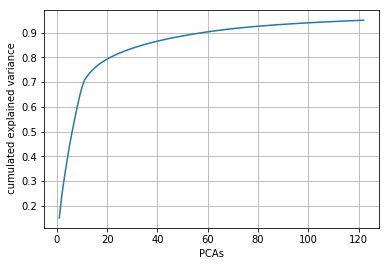

In [7]:
fv_pca_df, fig_pca = da.pca_with_target_variance(x_fv_df,0.95)
fig_pca.savefig(current_analysis_folder + current_class +'_PCA_095.png')

### t-SNE
t-distributed Neigbourhood Embedding -> 2 Dimensions


In [9]:
#fv_tsne_df = da.tsne(fv_pca_df,2)

t-sne done. time elapsed: 50.56147861480713 seconds


In [10]:
#save 2d dimensional tsne data 
#fv_tsne_df.to_csv(path_or_buf=current_analysis_folder+ current_class +"_2d_tsne.csv",index=False)

In [8]:
#load the stored tsne variables
fv_tsne_df = pd.read_csv(current_analysis_folder+current_class+"_2d_tsne.csv", sep=',', low_memory=False, error_bad_lines=False,header=None,skiprows=[0])

## visualize tsne reduced data

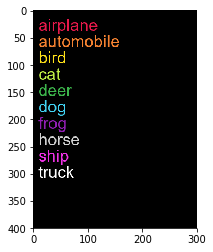

In [9]:
#Create a visualizer object
visualizer = vis.Visualizer(cifar10.class_names)
plt.imshow(visualizer.get_color_legend())

In [10]:
#Load Images
cifarDataManager = cifar10.CifarDataManager()
test_images = cifarDataManager.test.images
train_images = cifarDataManager.train.images
images = np.concatenate((test_images, train_images), axis=0)
print(str(images.shape))

x_images = images[x_fv_df.index.tolist(),:,:,:]

D:/tmp/cifar10_pythonversion/cifar-10-batches-py/data_batch_1
D:/tmp/cifar10_pythonversion/cifar-10-batches-py/data_batch_2
D:/tmp/cifar10_pythonversion/cifar-10-batches-py/data_batch_3
D:/tmp/cifar10_pythonversion/cifar-10-batches-py/data_batch_4
D:/tmp/cifar10_pythonversion/cifar-10-batches-py/data_batch_5
D:/tmp/cifar10_pythonversion/cifar-10-batches-py/test_batch
(60000, 32, 32, 3)


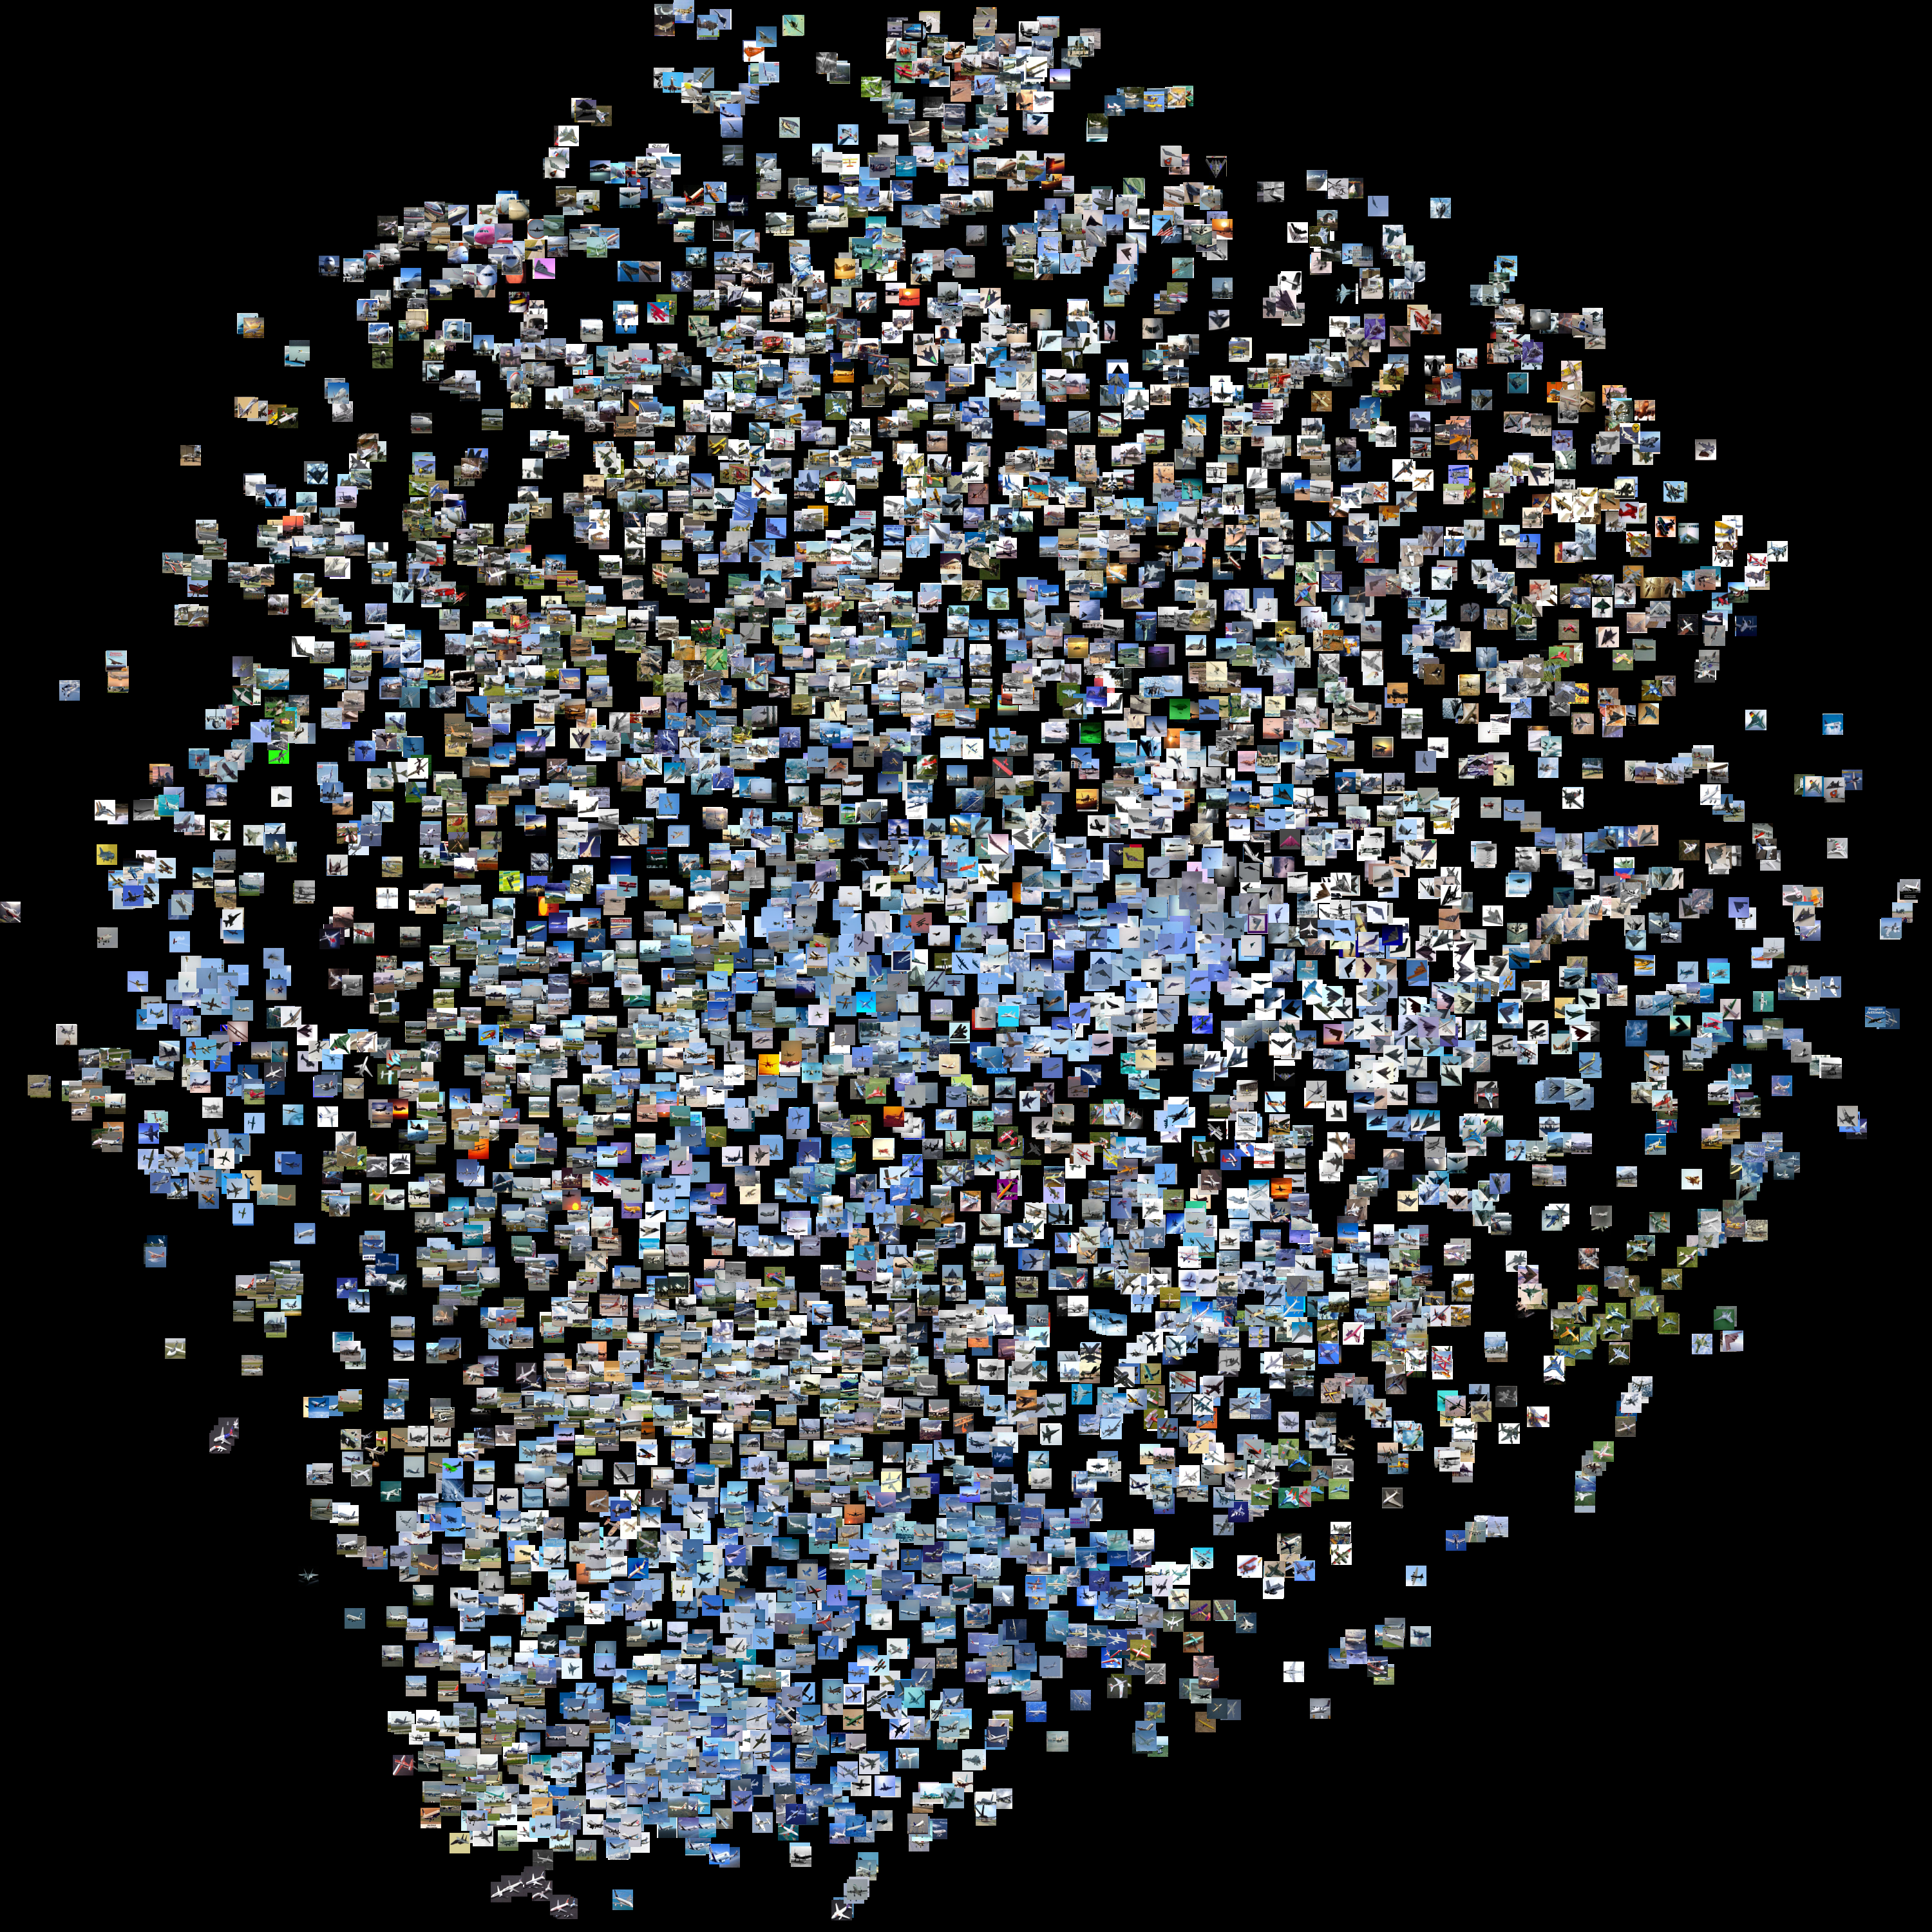

In [11]:
structure_images = visualizer.plot_images_2d(fv_tsne_df,x_logits_df,x_images,width=3000,height=3000)
structure_images.save(current_analysis_folder + current_class + '_images_noborder.png')
structure_images


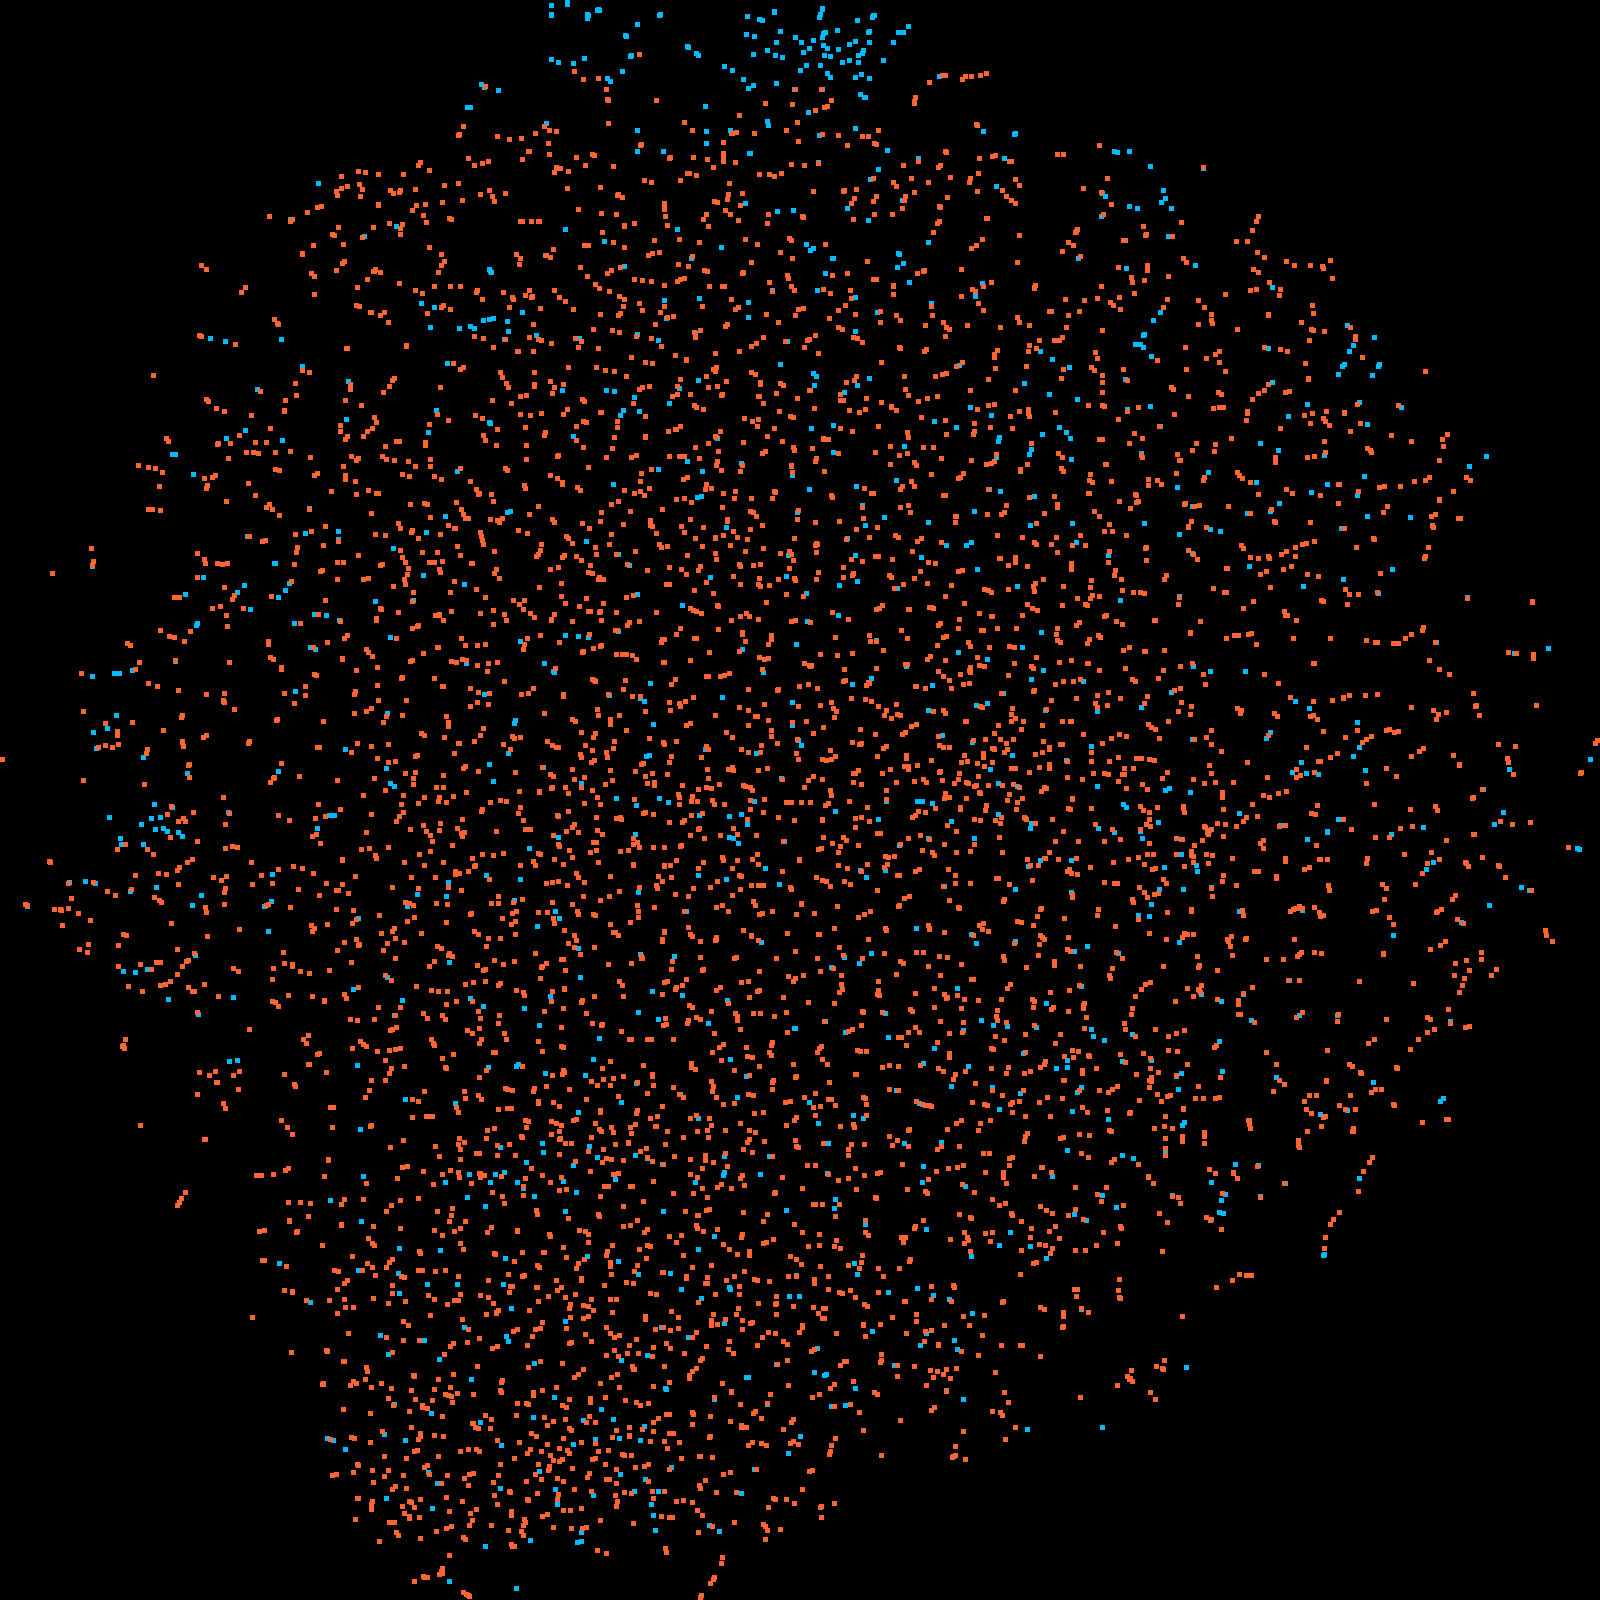

In [15]:
dots_split = visualizer.plot_pixel_2d(fv_tsne_df,x_logits_df, mode="datasplit",width=1600,height=1600,dotsize=5)
dots_split.save(current_analysis_folder + current_class + '_data_split.png')
dots_split

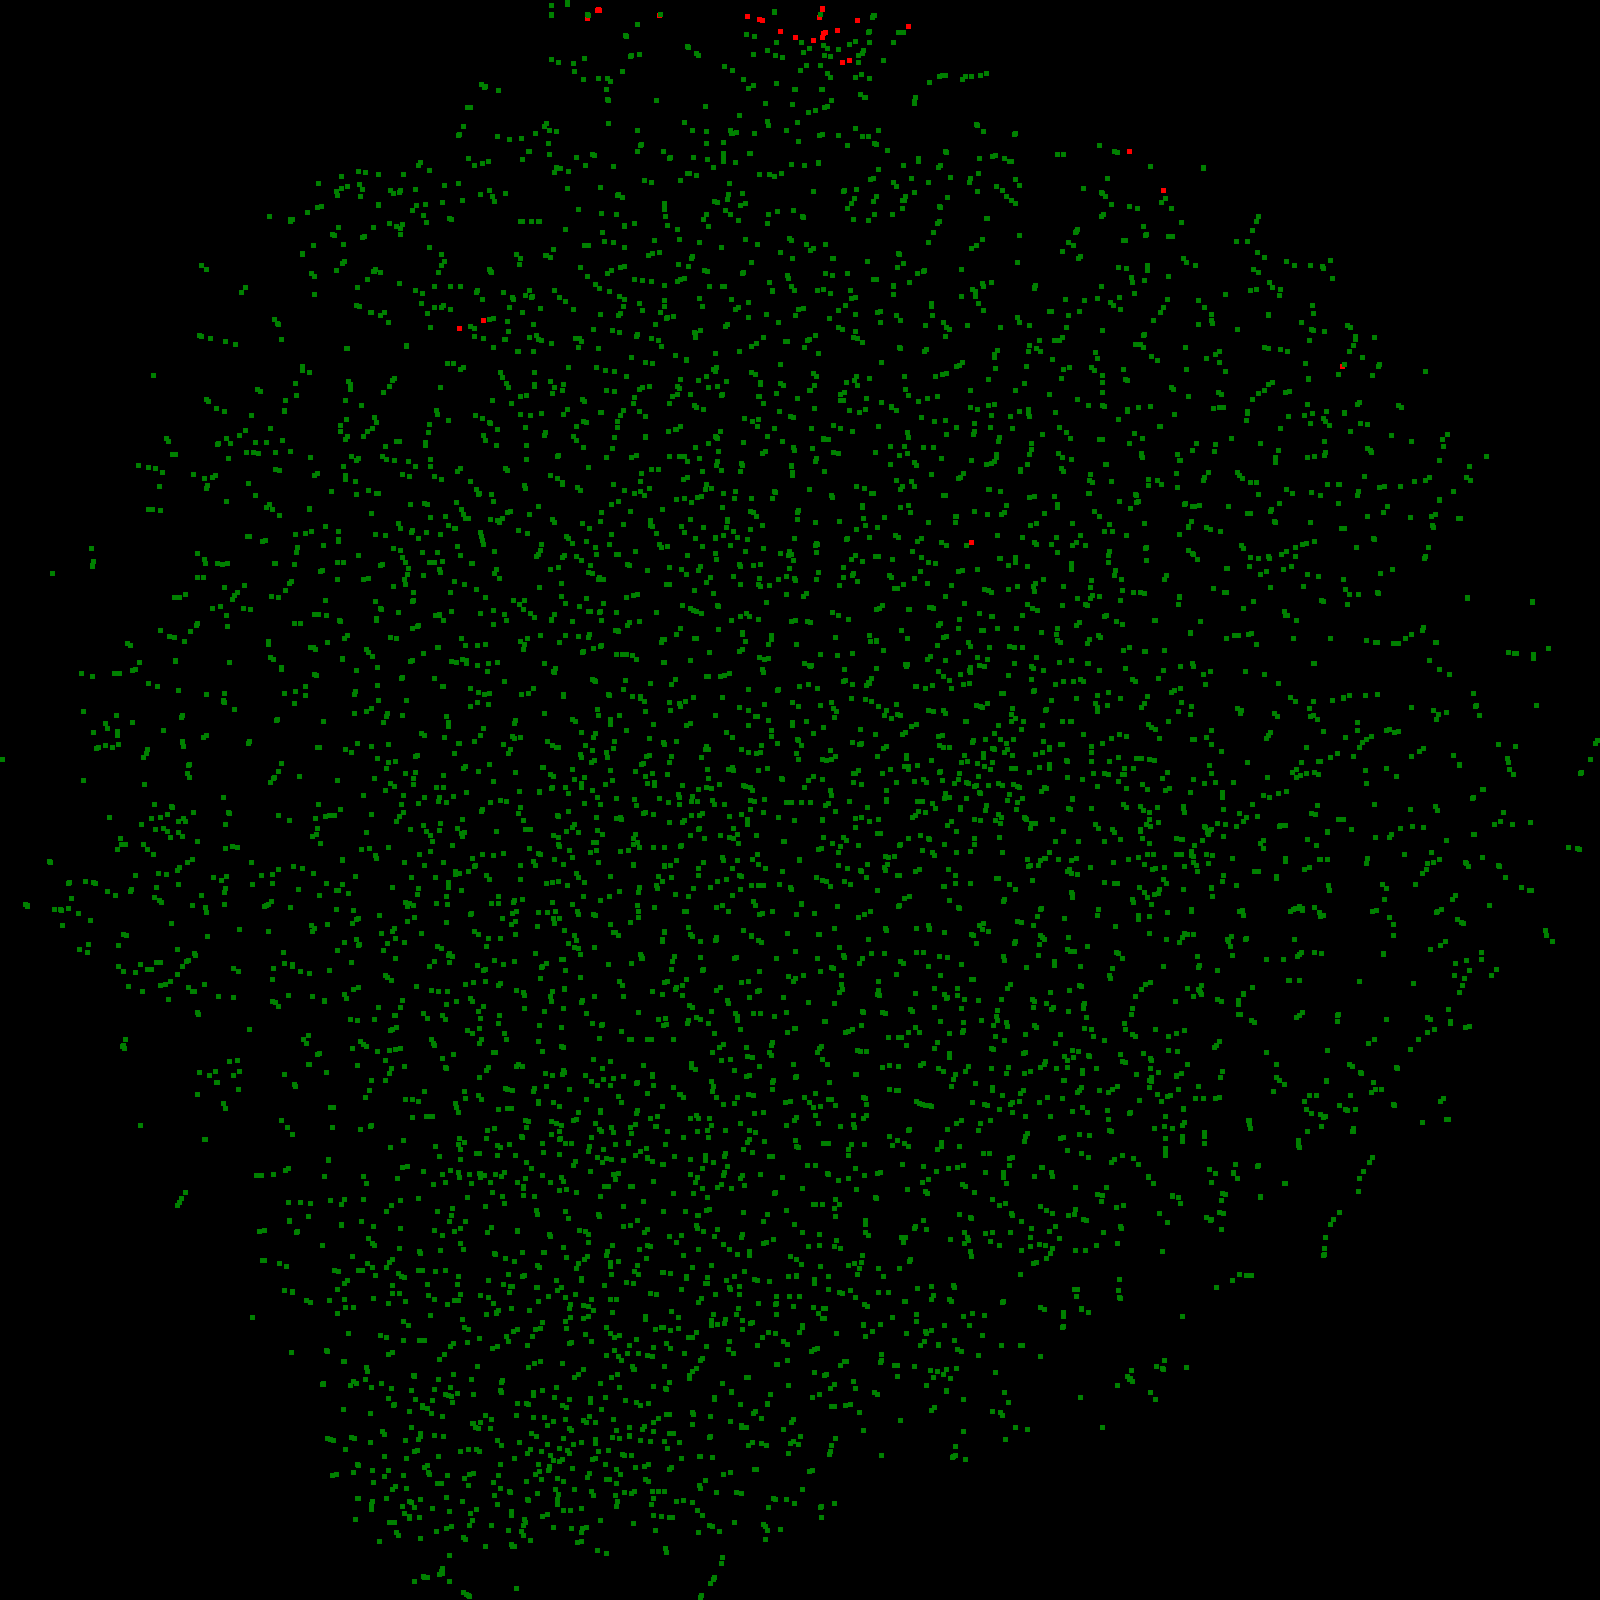

In [13]:
dots_error = visualizer.plot_pixel_2d(fv_tsne_df,x_logits_df, mode="error",width=1600,height=1600,dotsize=5)
dots_error.save(current_analysis_folder + current_class + '_error.png')
dots_error

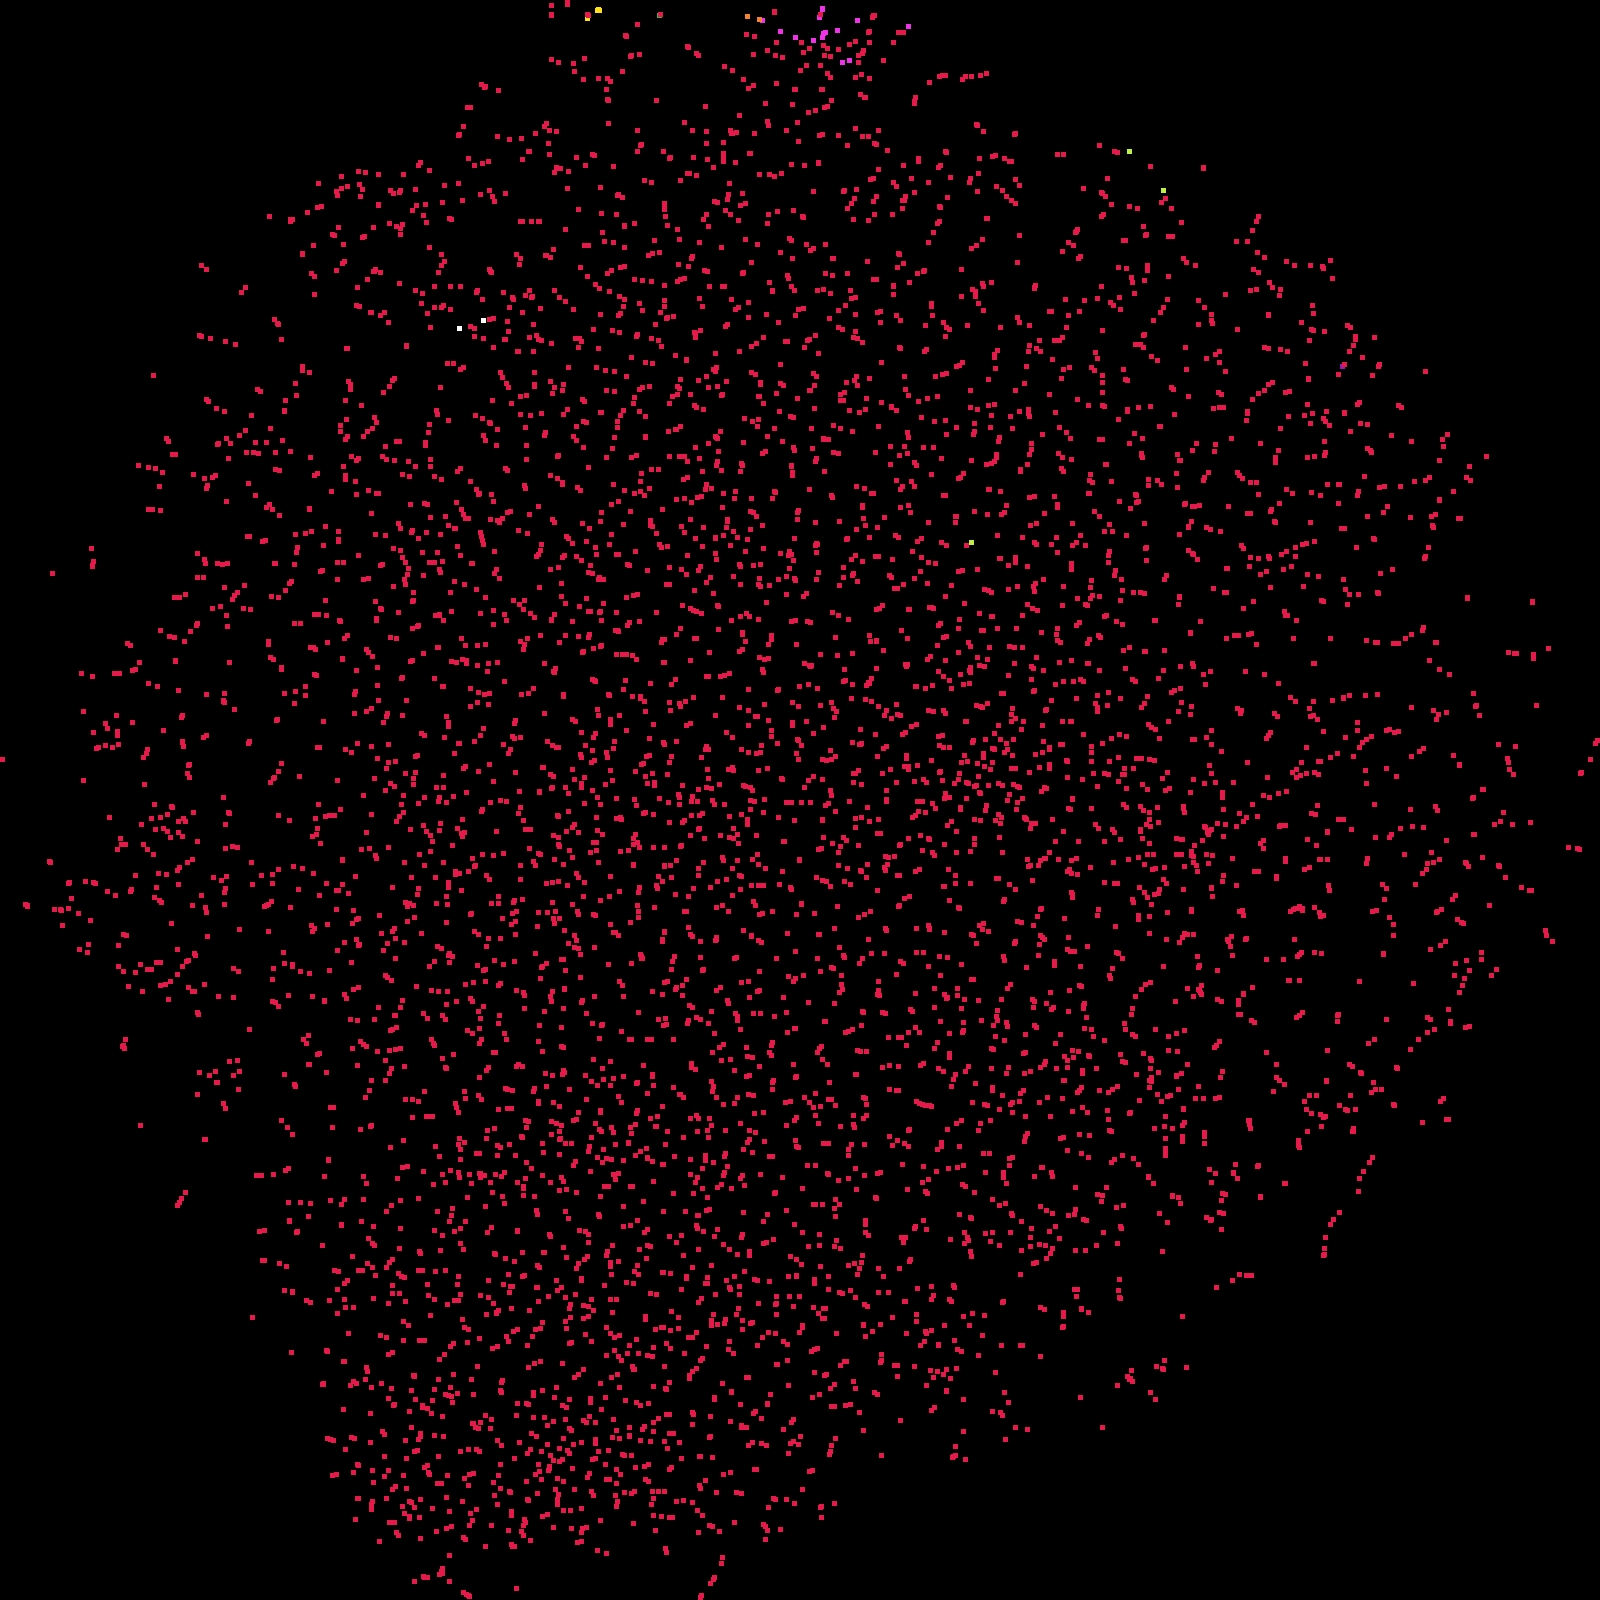

In [14]:
dots_prediction = visualizer.plot_pixel_2d(fv_tsne_df,x_logits_df, mode="prediction",width=1600,height=1600,dotsize=5)
dots_prediction.save(current_analysis_folder + current_class + '_prediction.png')
dots_prediction

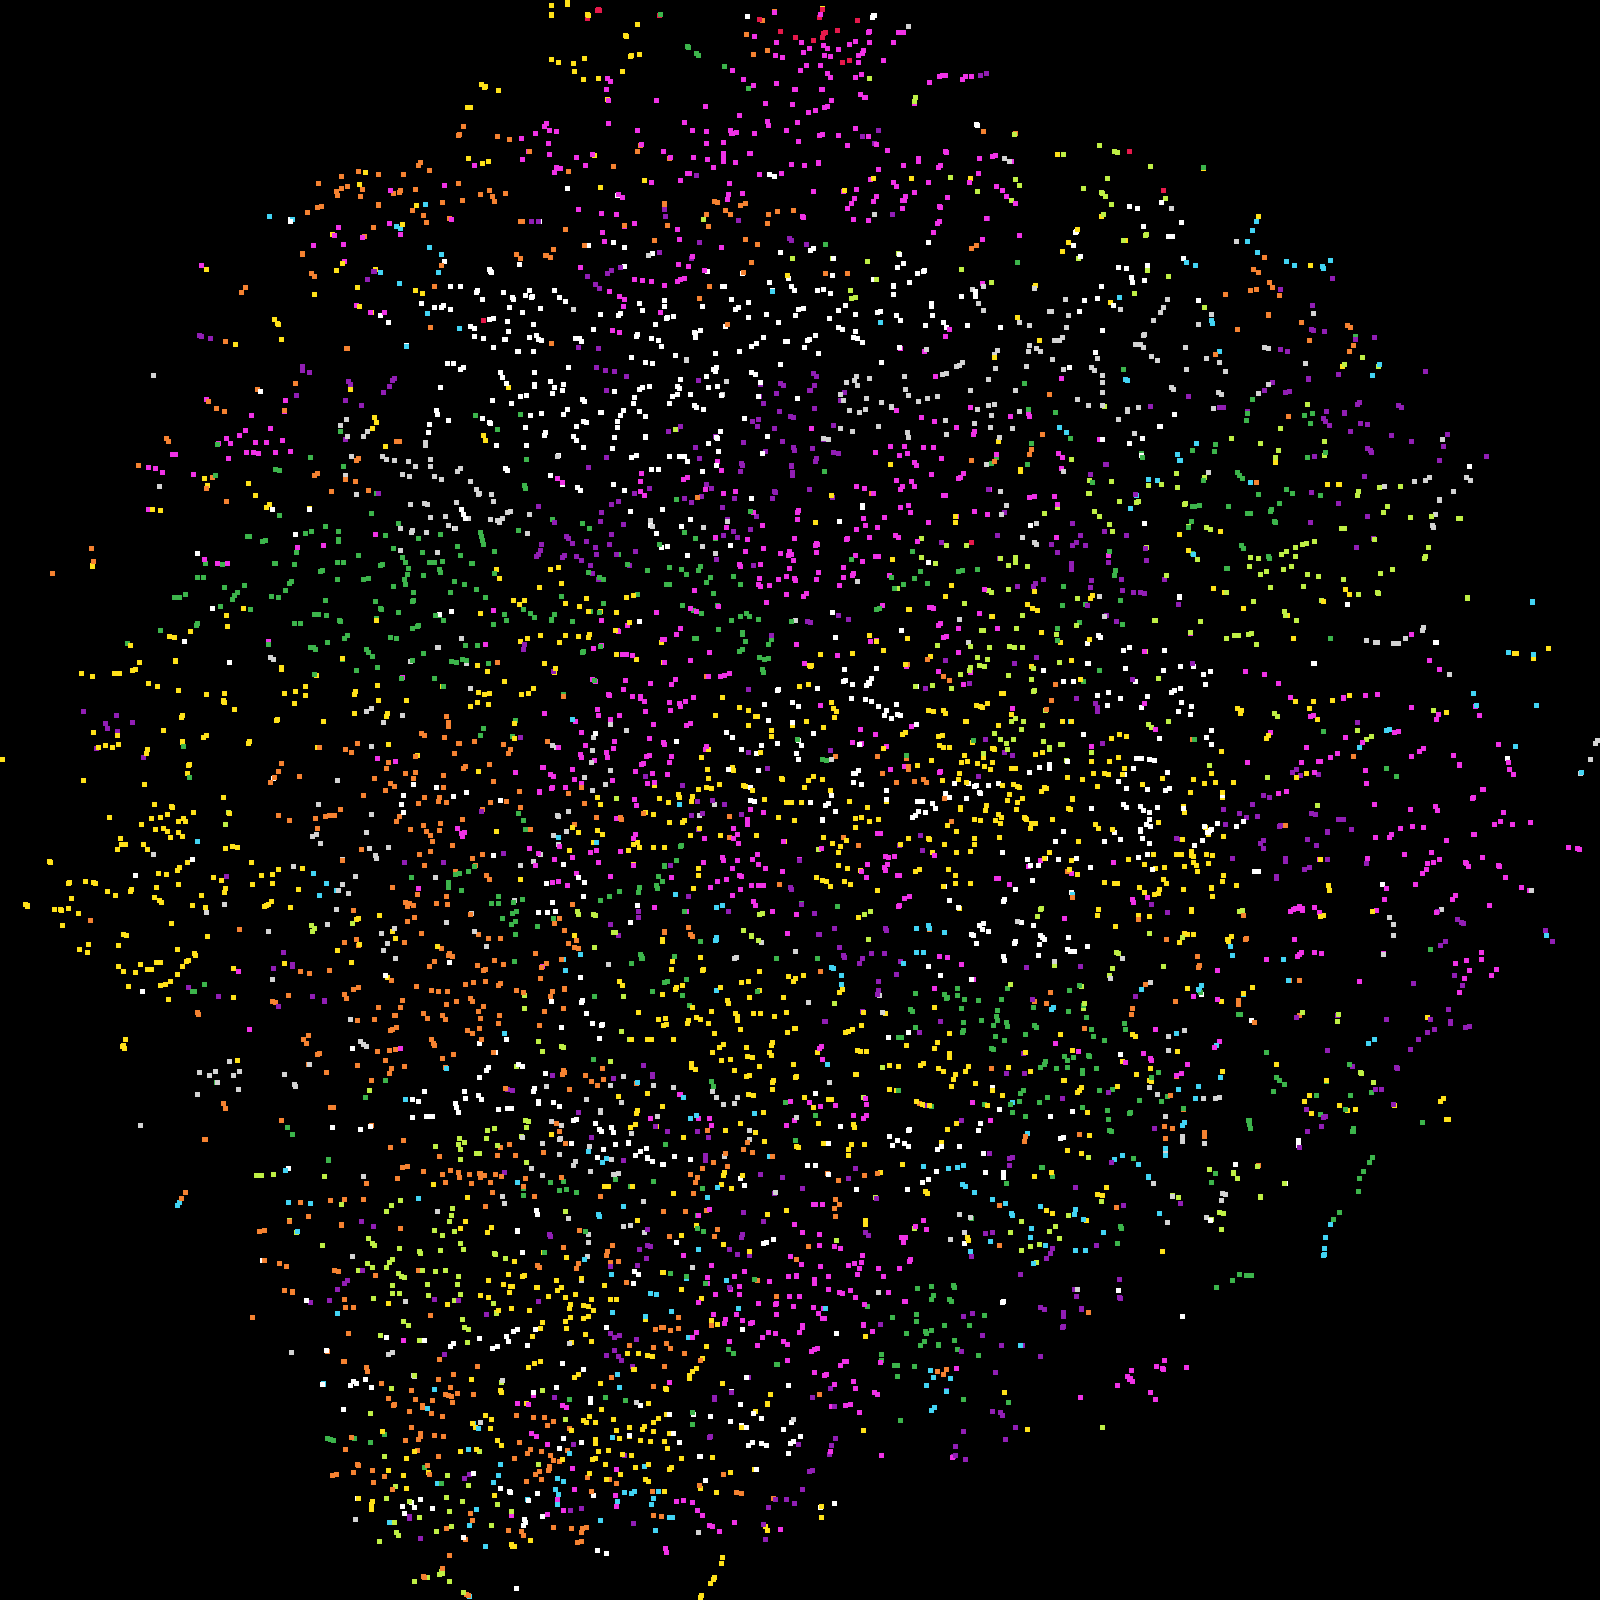

In [21]:
dots_out2 = visualizer.plot_pixel_2d(fv_tsne_df,x_logits_df, mode="output",class_nr=1,width=1600,height=1600,dotsize=5)
dots_out2.save(current_analysis_folder + current_class + '_2nd_highest_output.png')
dots_out2

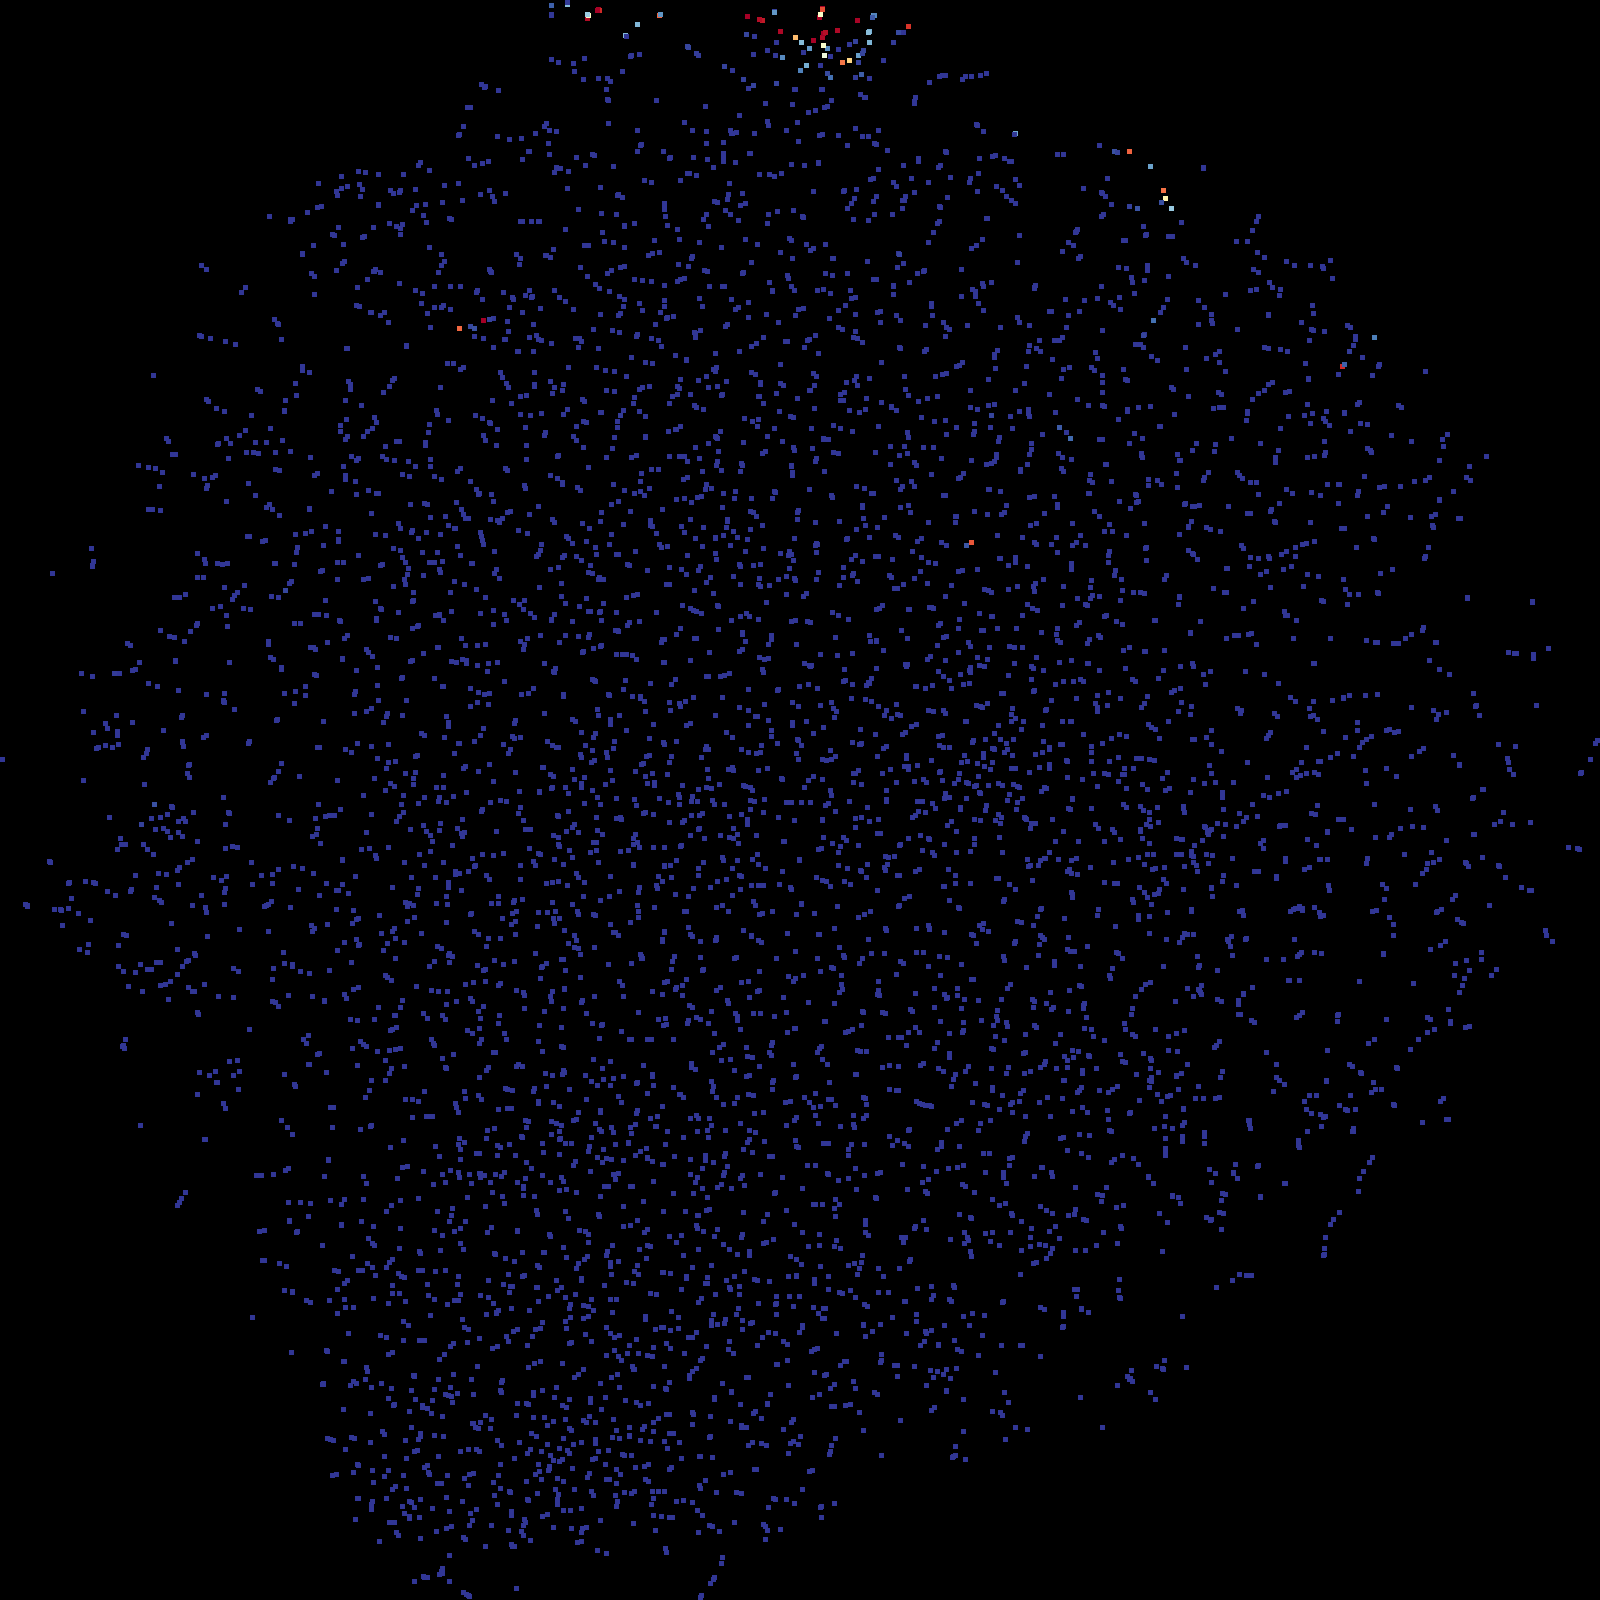

In [20]:
dots_conf = visualizer.plot_pixel_2d(fv_tsne_df,x_logits_df, mode="confidence",class_nr=0,width=1600,height=1600,dotsize=5)
dots_conf.save(current_analysis_folder + current_class + '_confidence.png')
dots_conf

## Clustering
k-means for 50-dim data (pca reduced)

kmeans done 49 times . time elapsed: 139.4220676422119 seconds


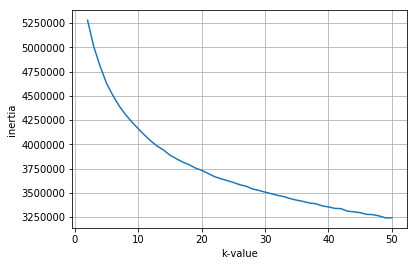

In [22]:
k_values_plot, partitions = da.kmeans_eval(fv_pca_df, 50)
k_values_plot.savefig(current_analysis_folder + current_class +'_K-Means.png')

choose k=10 -> partitions[8]

In [23]:
#choose a partition and analyse the clusters
#labels = partitions[8].predict(np.array(fv_pca_df))

In [29]:
#assign labels for datapoints in quantile
labels_manually = vis.assign_cluster_manually(partitions[8].transform(fv_pca_df),0.7)

6000
10


In [30]:
visualizer.plot_images_per_cluster(fv_tsne_df ,labels_manually,x_logits_df, images, current_analysis_folder)